In [72]:

# -- importing data manipulation libraries

import pandas as pd

import numpy as np


# -- importing visualization libraries

import matplotlib.pyplot as plt

import seaborn as sns


# -- importing warnings -  to filter irrelavant warnings

import warnings


# -- customizing working environment:

warnings.filterwarnings("ignore")

sns.set_theme()

pd.set_option("display.width",100)


In [26]:

nyc = pd.read_csv("https://raw.githubusercontent.com/Dineshkumar-Anbalagan/Tryout-notebooks/main/datasets/AB_NYC_2019.csv")

nyc.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
'''


#Function to Analyze dataset

def evaluate(data):
    
    print('Dimension of dataset:{}'.format(data.shape),'\n',67*'=')
    
    print('\nNumber of duplicated values:{}'.format(data.duplicated(keep = False).sum()),'\n',67*'=')
    
    print('\nRows contain null values:\n{}'.format(data.isnull().sum()),'\n',67*'=')
    
    print('\nSchema of the dataset:\n{}'.format(data.info()),'\n',67*'=')
    
    print('\nDescriptive Analysis:\n{}'.format(data.describe()),'\n',67*'=')
    
    print('\nCorrelation:\n{}'.format(data.corr()),'\n',67*'=')
    
'''


print(f"The dimension of the dataset nyc is : {nyc.shape}")
    

The dimension of the dataset nyc is : (48895, 16)


In [28]:

nyc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [29]:

'''

        From the above information, it appears that we got a presence of null values in the dataset. 
        
        Let's do a further analysis to find out how to handle those null values present in the dataset.

'''

nyc.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:

'''

       [1] From the above null values information, we can clearly see that the columns "last_review"
        
        and "reviews_per_month" holds the major null value presence in it. Since, it's ratio is quite high
        
        with the total dimension of the tables, it's not advisable to replace those null values 
        
        with values of the central tendancies. Hence I resort to dropping those two columns. 
        
        
       [2] Meanwhile, the columns "name" and "host_name" constitute to the presence of very low 
        
        null records, we can just drop them too.

'''

nyc.drop(["last_review","reviews_per_month"], axis = 1, inplace = True) # dropping columns

nyc.dropna(axis = 0, inplace = True)

nyc.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [33]:

nyc.duplicated(keep = False).sum() # Check for duplicate records


0

In [31]:

'''

        [1] null values --> check
        
        [2] duplicate values --> check
        
        [3] dtypes --> check

'''

nyc.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [37]:

'''

        Now that we formatted our dataset, we can start performing our analysis.

'''

# -- descriptive analysis

nyc.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


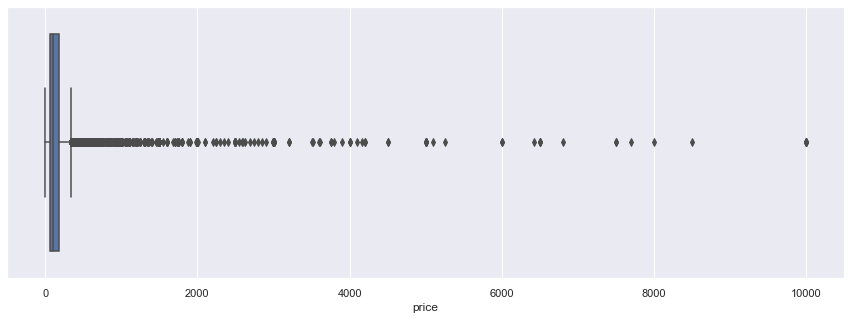

In [74]:
# -- boxplot :

plt.figure(figsize = (15,5))

sns.boxplot(nyc["price"])

plt.show()


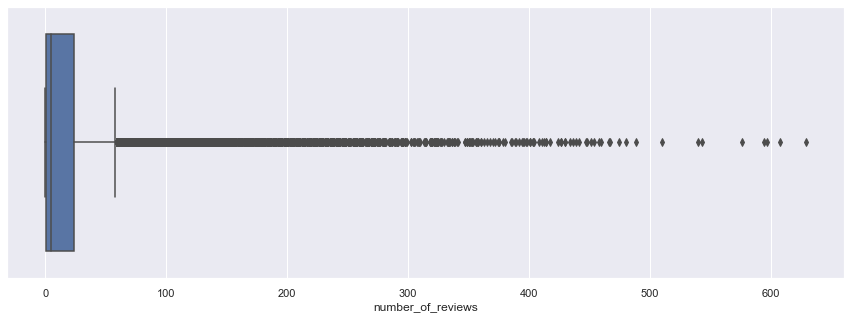

In [75]:

plt.figure(figsize = (15,5))

sns.boxplot(nyc["number_of_reviews"])

plt.show()


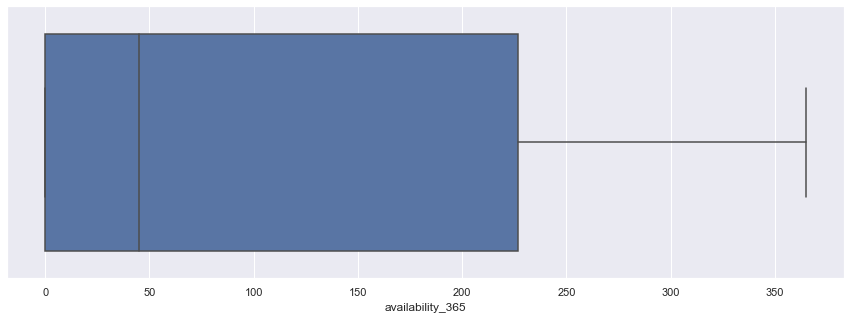

In [76]:

plt.figure(figsize = (15,5))

sns.boxplot(nyc["availability_365"])

plt.show()


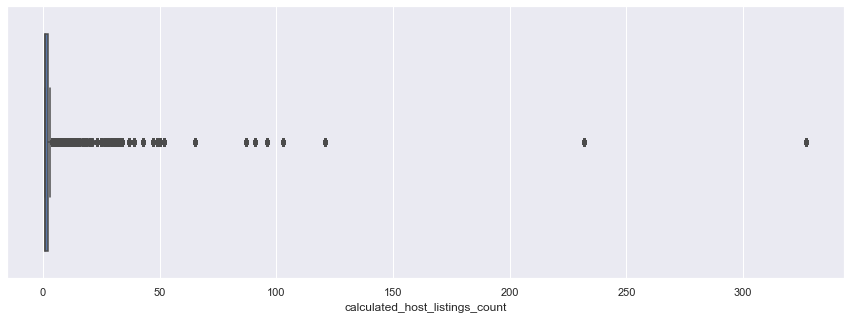

In [77]:

plt.figure(figsize = (15,5))

sns.boxplot(nyc["calculated_host_listings_count"])

plt.show()


In [38]:

nyc.corr() #correlation


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.133224,0.085616
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.154954,0.203743
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,0.019548,-0.010775
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,-0.114746,0.082754
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,0.057460,0.081817
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,0.131313,0.145953
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,-0.072408,0.171855
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,1.000000,0.225784
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.225784,1.000000


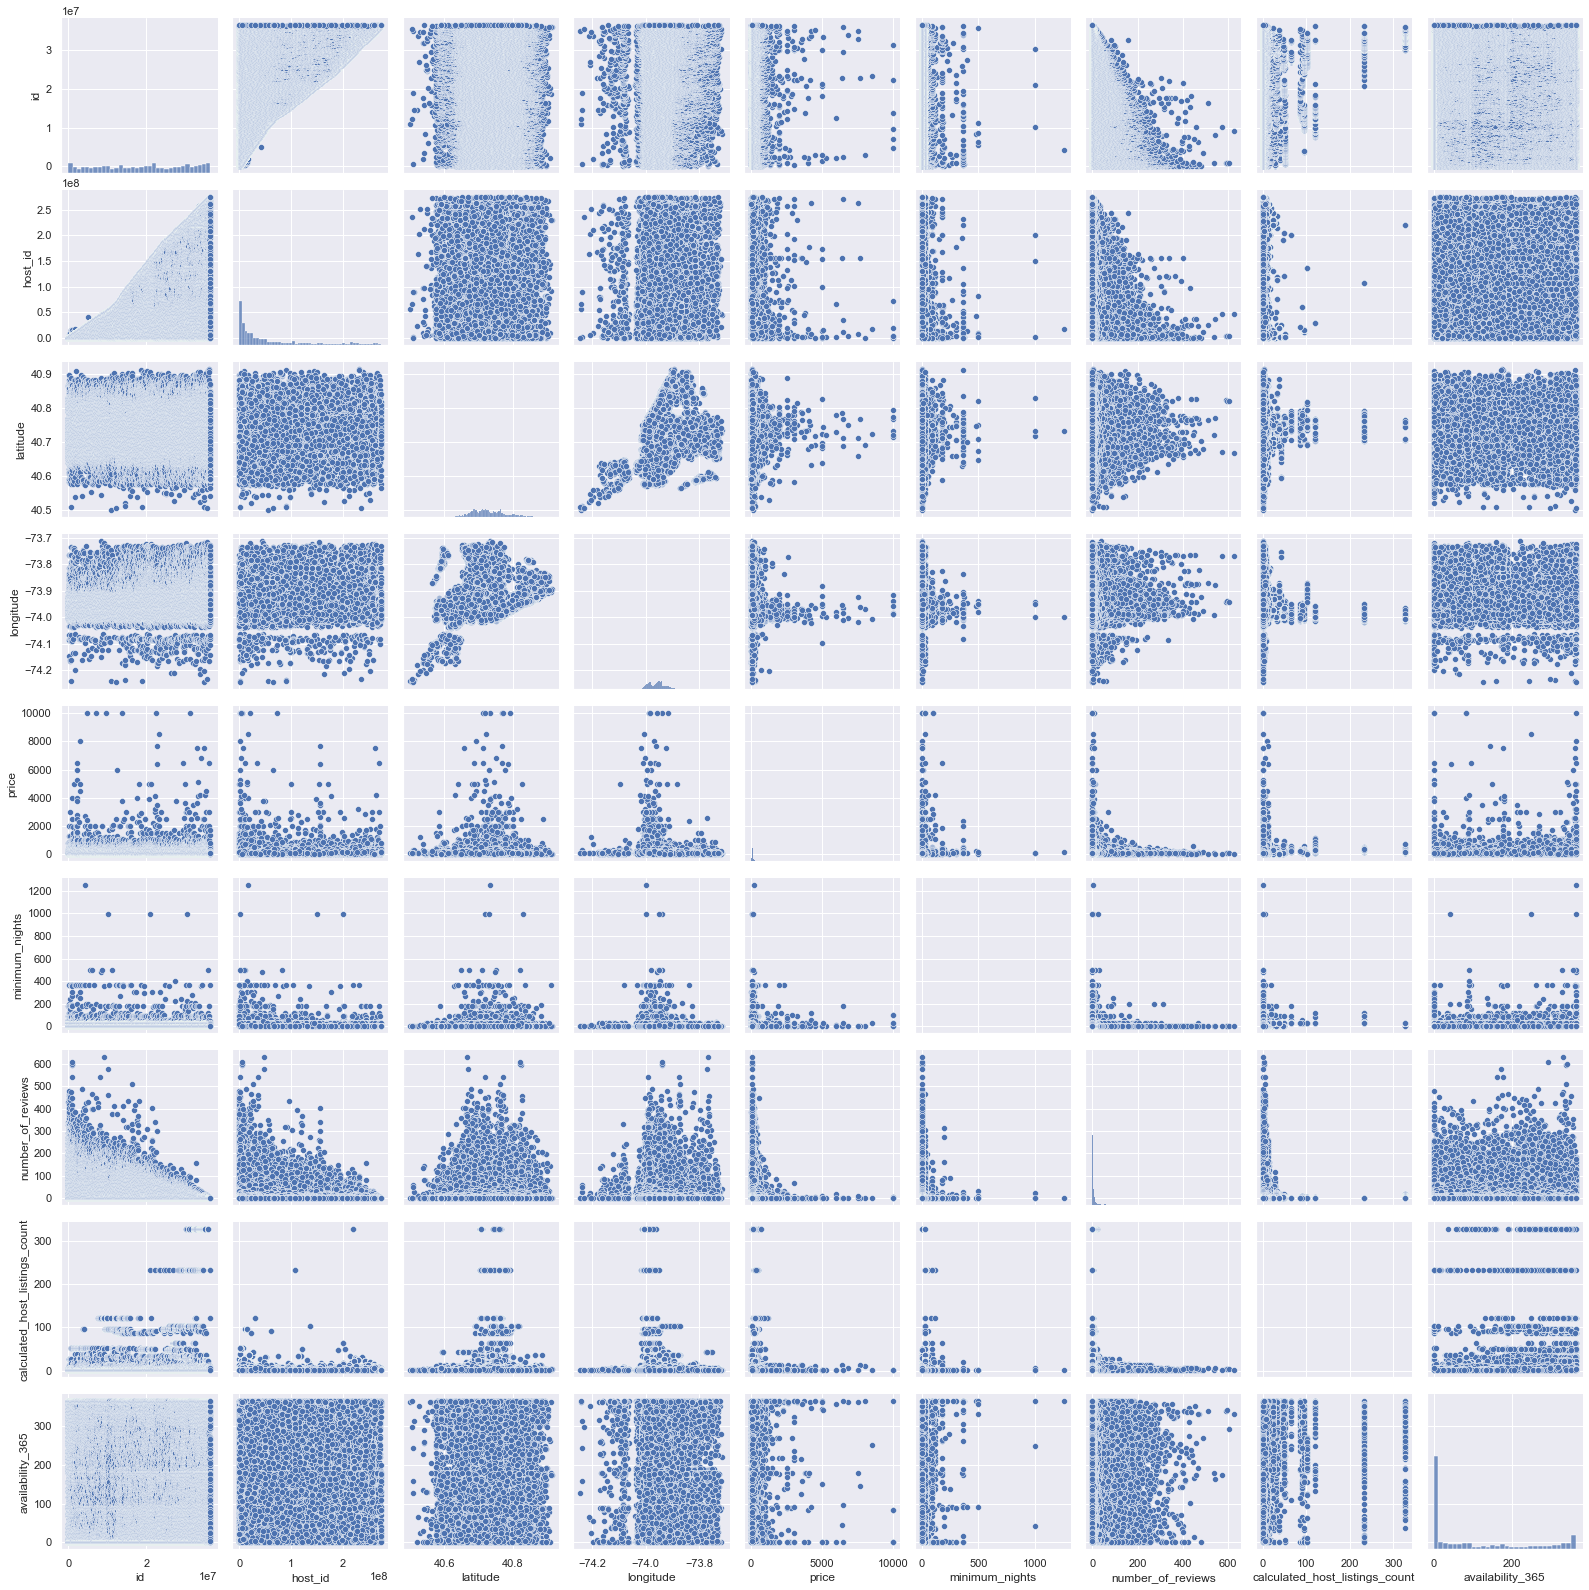

In [78]:

sns.pairplot(nyc)

plt.show()


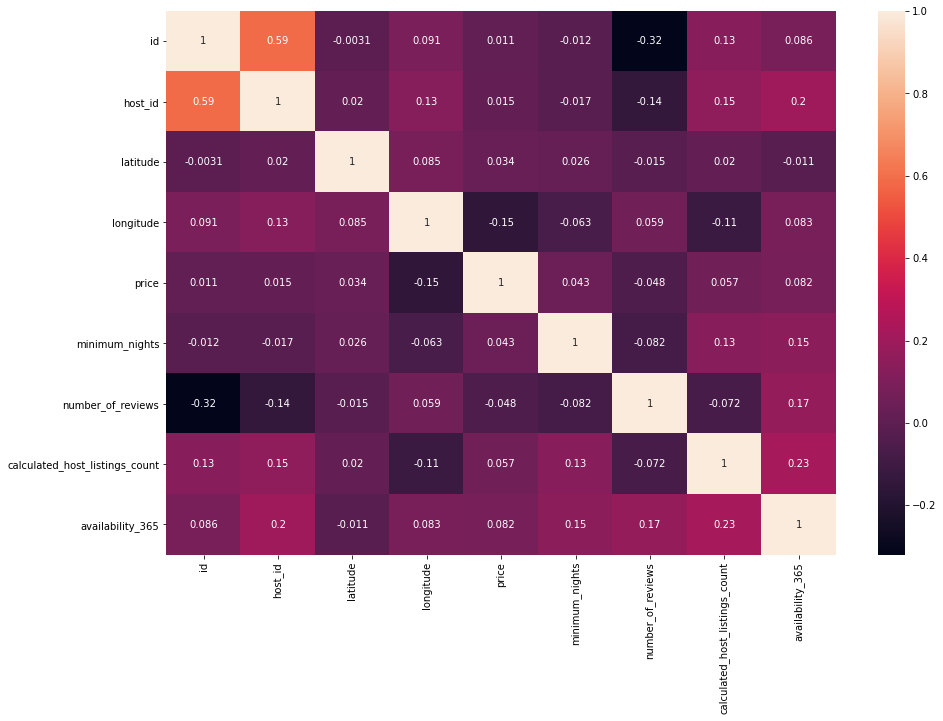

In [60]:

# -- heatmap to check for correlation :

plt.figure(figsize = (15,10))

sns.heatmap(nyc.corr(), annot = True)

plt.show()


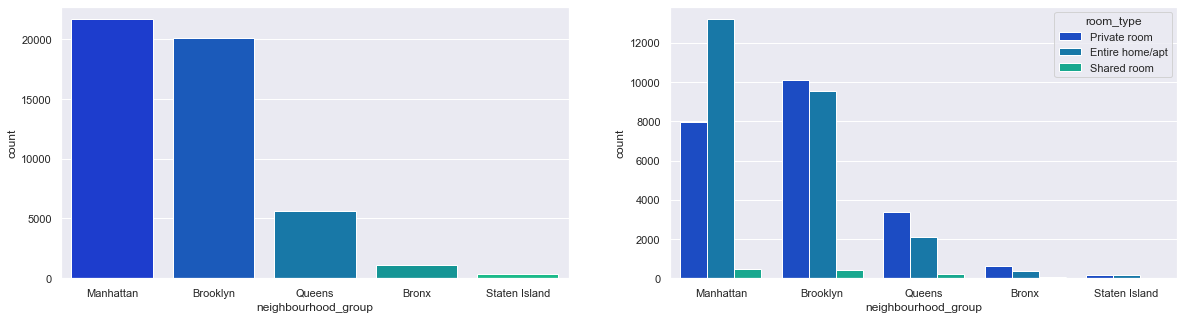

In [95]:

plt.figure(figsize = (20,5))

plt.subplot(1,2,1)

sns.countplot(
    
    nyc["neighbourhood_group"], 
    
    palette = "winter", 
    
    order = nyc["neighbourhood_group"].value_counts().index
)

plt.subplot(1,2,2)

sns.countplot(
    
    nyc["neighbourhood_group"], 
    
    hue = nyc["room_type"], 
    
    palette = "winter",
    
    order = nyc["neighbourhood_group"].value_counts().index
)

plt.show()


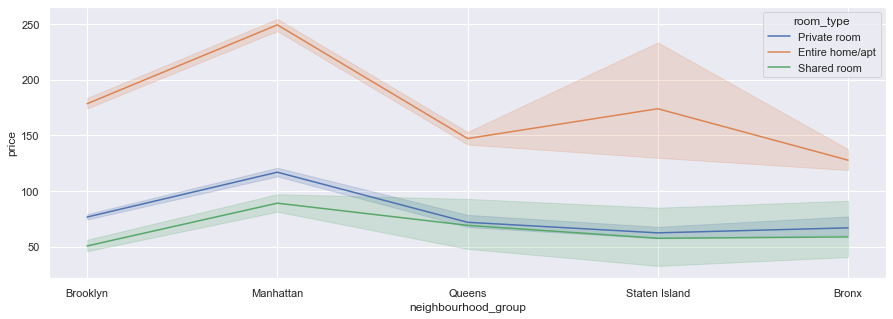

In [104]:

plt.figure(figsize = (15,5))

sns.lineplot(x = nyc["neighbourhood_group"], y = nyc["price"], hue = nyc["room_type"])

plt.show()


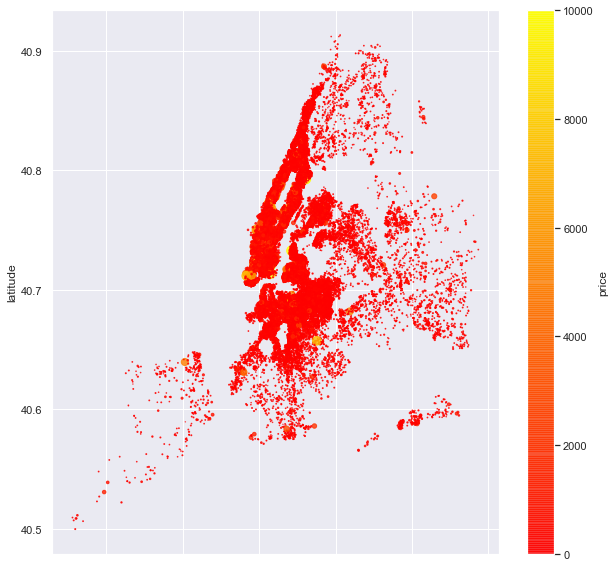

In [149]:

nyc.plot(

    kind = "scatter", x = "longitude", y = "latitude", alpha = 0.8,
    
    c = "price", cmap = plt.get_cmap("autumn"), colorbar= True,
    
    figsize = (10,10), s = nyc["price"]/100

)

plt.show()


## NEW METHODS : 

In [196]:

import plotly.graph_objs as go

from plotly.offline import iplot, init_notebook_mode

import cufflinks

cufflinks.go_offline(connected=True)

init_notebook_mode(connected=True)


In [201]:
nyc["neighbourhood_group"].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [210]:

staten_island = nyc[nyc["neighbourhood_group"] == "Staten Island"].reset_index().drop(["index","id","host_id","name","host_name"], axis = 1)

staten_island.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,1,312
1,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,6,360
2,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,6,0
3,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,177,6,320
4,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,333,6,340


In [215]:

staten_island["price"].iplot(
    
    kind = "hist", 
    
    xTitle = "price",
    
    yTitle = "frequency",
    
    title = "price_distribution"

)

In [214]:

data = staten_island[["minimum_nights","price","number_of_reviews"]]

data.set_index("minimum_nights", inplace = True)

data.iplot(kind = "scatter", mode ='lines+markers')


In [236]:

data = staten_island[["room_type","price"]]

data.set_index("room_type", inplace = True)

data.iplot(kind = "bar", xTitle = "room_type", yTitle = "Price")


In [237]:

data = staten_island[["room_type","neighbourhood","price"]]

data.set_index(["room_type","neighbourhood"], inplace = True)

data.iplot(kind = "bar", xTitle = "room_type", yTitle = "Price")


In [262]:
data = staten_island[["latitude","longitude"]]

data.set_index(["longitude"], inplace = True)

data.iplot(
    
    kind = "scatter", 
    
    xTitle = "longitude", 
    
    yTitle = "latitude",
    
    mode = "markers+lines",
    
    color = "crimson",
    
    title = "lat-long connect"

)